<img src="https://search.pstatic.net/common/?src=http%3A%2F%2Fimgnews.naver.net%2Fimage%2F5125%2F2023%2F10%2F10%2F0000128447_001_20231010182001257.png&type=sc960_832" width="40%">

# **구글 주가(2004-2023)**


2004년부터 2023년(11월 10일)까지의 구글 주가 데이터셋을 이용하여 분석했습니다.
(Kaggle 사이트의 데이터셋을 이용 [링크 텍스트](https://www.kaggle.com/datasets/surajjoshi26/google-stock-price2004-2023/data))


데이터 세트 관련 정보:

현재 데이터 세트는 Google이 상장한 2004년 8월 19일부터 2023년 11월 10일까지 4,842개 거래 세션의 주가 정보로 Google의 주가를 나타냅니다. 주어진 데이터 세트에는 특정 기간 동안 주식의 거래 활동 및 성과에 대한 정보를 제공하는 7개의 서로 다른 요소(각 열에 표시)가 있습니다. 모든 요소에 대한 간략한 개요는 다음과 같습니다.



*   **날짜**: 이 열은 주식에 대한 데이터가 기록된 달력 날짜를 나타냅니다.
*   **시가**: 이 열은 거래 세션 동안 최초로 기록된 주식 가격을 나타냅니다.
*   **고가**: 고가는 특정 거래 세션 동안 주식의 최고 거래 가격을 나타냅니다. 이는 해당 주식이 하루 동안 도달한 최고가를 반영합니다.
*   **저가**: 저가는 특정 거래 세션 동안 주식의 가장 낮은 거래 가격입니다. 하루 동안 주식이 도달한 최소 가치를 나타냅니다.
*   마감: 마감 가격은 거래 세션이 끝날 때 주식의 마지막 거래 가격입니다. 이는 시장이 마감되기 전에 주식이 거래된 최종 가치를 반영합니다.
*   **Adj Close(조정된 마감)**: 조정된 마감 가격은 주식 가격에 영향을 미칠 수 있지만 실적과 직접적인 관련이 없는 배당금, 주식 분할 및 신주 공모와 같은 기업 활동을 설명합니다. 조정된 마감은 시간 경과에 따른 주식 성과를 평가하는 데 자주 사용됩니다.
*   **거래량**: 거래량은 특정 기간 동안 거래된 총 주식 수를 나타냅니다. 이는 해당 주식의 시장 활동 및 유동성 수준을 나타냅니다. 거래량이 많다는 것은 종종 투자자의 관심이 높아졌다는 것을 의미하는 반면, 거래량이 적다는 것은 거래가 덜 활발하다는 것을 의미할 수 있습니다.





데이터의 양이 많아 2023년을 포함하여 2004년부터 4년단위로 2008년, 2012년, 2016년, 2020년으로 나누어 총 6개의 데이터셋으로 비교, 분석을 했습니다.



1.   각 연도별로 주식 데이터 분류
2.   "Adj Close(조정된 마감)"을 이용하여 각 연도별로 평균 가격을 추출하여 그래프를 통해 비교,분석
3.   "거래량"을 이용하여 각 연도별로 월을 기준으로 최저 거래량과 최다 거래량 비교, 분석
4. "Adj Close"이용하여 각 연도별로 첫 월에 50주 매수하고 마지막 월에 50주 매도했다고 가정했을 때 수익률 분석, 비교







In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('./google_stock_price.csv')

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
#구글 주가(2004~2023) 데이터
#날짜/시가/고가/저가/마감/조정된 마감/거래량
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512
...,...,...,...,...,...,...,...
4837,2023-11-06,130.220001,131.559998,129.929993,131.449997,131.449997,15360400
4838,2023-11-07,131.979996,133.279999,131.139999,132.399994,132.399994,19223800
4839,2023-11-08,132.360001,133.539993,132.160004,133.259995,133.259995,15093600
4840,2023-11-09,133.360001,133.960007,131.509995,131.690002,131.690002,17976500


In [5]:
# df의 크기 확인 (4842, 7) -> 행의 개수 4842개, 열의 개수 7개
df.shape

(4842, 7)

In [6]:
# df의 기본 정보를 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4842 entries, 0 to 4841
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4842 non-null   object 
 1   Open       4842 non-null   float64
 2   High       4842 non-null   float64
 3   Low        4842 non-null   float64
 4   Close      4842 non-null   float64
 5   Adj Close  4842 non-null   float64
 6   Volume     4842 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 264.9+ KB


In [7]:
# df의 각 열이 가지고 있는 원소 개수 확인
df.count()

Date         4842
Open         4842
High         4842
Low          4842
Close        4842
Adj Close    4842
Volume       4842
dtype: int64

# ✅ 2004년, 2008년, 2012년, 2016년, 2020년, 2023년 분류



1.   각 연도별 주식 데이터 분류(2004, 2008, 2012, 2016, 2020, 2023)



In [8]:
df['Date'] = pd.to_datetime(df['Date'])

# 각 연도별 데이터 추출(소수점 2자리까지)
data_2004 = round(df[df['Date'].dt.year == 2004], 2)
data_2008 = round(df[df['Date'].dt.year == 2008], 2)
data_2012 = round(df[df['Date'].dt.year == 2012], 2)
data_2016 = round(df[df['Date'].dt.year == 2016], 2)
data_2020 = round(df[df['Date'].dt.year == 2020], 2)
data_2023 = round(df[df['Date'].dt.year == 2023], 2)

In [9]:
#2004년 구글 주가 데이터
data_2004

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.49,2.59,2.39,2.50,2.50,897427216
1,2004-08-20,2.52,2.72,2.50,2.70,2.70,458857488
2,2004-08-23,2.76,2.83,2.72,2.72,2.72,366857939
3,2004-08-24,2.77,2.78,2.58,2.61,2.61,306396159
4,2004-08-25,2.61,2.69,2.59,2.64,2.64,184645512
...,...,...,...,...,...,...,...
89,2004-12-27,4.71,4.81,4.71,4.78,4.78,245079187
90,2004-12-28,4.78,4.82,4.76,4.80,4.80,166453579
91,2004-12-29,4.78,4.82,4.78,4.80,4.80,107525527
92,2004-12-30,4.81,4.94,4.78,4.92,4.92,237057231


In [10]:
#2008년 구글 주가 데이터
data_2008

,Date,Open,High,Low,Close,Adj Close,Volume
848,2008-01-02,17.26,17.37,16.88,17.07,17.07,172921733
849,2008-01-03,17.07,17.11,16.85,17.07,17.07,130587647
850,2008-01-04,16.93,16.96,16.31,16.36,16.36,215195594
851,2008-01-07,16.29,16.50,15.87,16.17,16.17,257096061
852,2008-01-08,16.26,16.44,15.72,15.73,15.73,214364490
...,...,...,...,...,...,...,...
1096,2008-12-24,7.51,7.63,7.43,7.55,7.55,77148090
1097,2008-12-26,7.57,7.60,7.43,7.48,7.48,78657728
1098,2008-12-29,7.48,7.51,7.26,7.41,7.41,148631025
1099,2008-12-30,7.49,7.64,7.44,7.55,7.55,154316255


In [11]:
#2012년 구글 주가 데이터
data_2012

,Date,Open,High,Low,Close,Adj Close,Volume
1857,2012-01-03,16.26,16.64,16.25,16.57,16.57,147611217
1858,2012-01-04,16.56,16.69,16.45,16.64,16.64,114989399
1859,2012-01-05,16.49,16.54,16.34,16.41,16.41,131808205
1860,2012-01-06,16.42,16.44,16.18,16.19,16.19,108119746
1861,2012-01-09,16.10,16.11,15.47,15.50,15.50,233776981
...,...,...,...,...,...,...,...
2102,2012-12-24,17.80,17.81,17.62,17.67,17.67,33762076
2103,2012-12-26,17.64,17.76,17.49,17.66,17.66,47473277
2104,2012-12-27,17.61,17.65,17.40,17.59,17.59,66142994
2105,2012-12-28,17.48,17.61,17.43,17.43,17.43,56290202


In [12]:
#2016년 구글 주가 데이터
data_2016

,Date,Open,High,Low,Close,Adj Close,Volume
2863,2016-01-04,37.15,37.20,36.56,37.09,37.09,65456000
2864,2016-01-05,37.32,37.60,36.93,37.13,37.13,39014000
2865,2016-01-06,36.50,37.36,36.45,37.18,37.18,38940000
2866,2016-01-07,36.52,36.92,35.95,36.32,36.32,59274000
2867,2016-01-08,36.57,36.66,35.65,35.72,35.72,49018000
...,...,...,...,...,...,...,...
3110,2016-12-23,39.54,39.64,39.36,39.50,39.50,12468000
3111,2016-12-27,39.53,39.89,39.38,39.58,39.58,15782000
3112,2016-12-28,39.69,39.71,39.16,39.25,39.25,23076000
3113,2016-12-29,39.17,39.30,38.95,39.14,39.14,14886000


In [13]:
#2020년 구글 주가 데이터
data_2020

,Date,Open,High,Low,Close,Adj Close,Volume
3869,2020-01-02,67.08,68.41,67.08,68.37,68.37,28132000
3870,2020-01-03,67.39,68.62,67.28,68.03,68.03,23728000
3871,2020-01-06,67.50,69.82,67.50,69.71,69.71,34646000
3872,2020-01-07,69.90,70.15,69.52,69.67,69.67,30054000
3873,2020-01-08,69.60,70.58,69.54,70.22,70.22,30560000
...,...,...,...,...,...,...,...
4117,2020-12-24,86.75,87.30,86.46,86.94,86.94,6936000
4118,2020-12-28,87.58,89.54,87.32,88.80,88.80,27860000
4119,2020-12-29,89.39,89.62,87.80,87.94,87.94,25988000
4120,2020-12-30,88.10,88.25,86.28,86.98,86.98,26122000


In [14]:
#2023년 구글 주가 데이터
data_2023

,Date,Open,High,Low,Close,Adj Close,Volume
4625,2023-01-03,89.83,91.55,89.02,89.70,89.70,20738500
4626,2023-01-04,91.01,91.24,87.80,88.71,88.71,27046500
4627,2023-01-05,88.07,88.21,86.56,86.77,86.77,23136100
4628,2023-01-06,87.36,88.47,85.57,88.16,88.16,26612600
4629,2023-01-09,89.19,90.83,88.58,88.80,88.80,22996700
...,...,...,...,...,...,...,...
4837,2023-11-06,130.22,131.56,129.93,131.45,131.45,15360400
4838,2023-11-07,131.98,133.28,131.14,132.40,132.40,19223800
4839,2023-11-08,132.36,133.54,132.16,133.26,133.26,15093600
4840,2023-11-09,133.36,133.96,131.51,131.69,131.69,17976500


# ✅평균 가격

1. 각 연도별로 주식 데이터를 분류하여 각 연도에 대한 평균 Adjusted Close를 계산합니다.
2. Matplotlib을 사용하여 막대 그래프를 생성하고, x축은 연도를 나타내며 y축은 평균 Adjusted Close를 나타냅니다.
3. 각 막대 위에 해당 연도의 평균 Adjusted Close를 텍스트로 표시합니다.

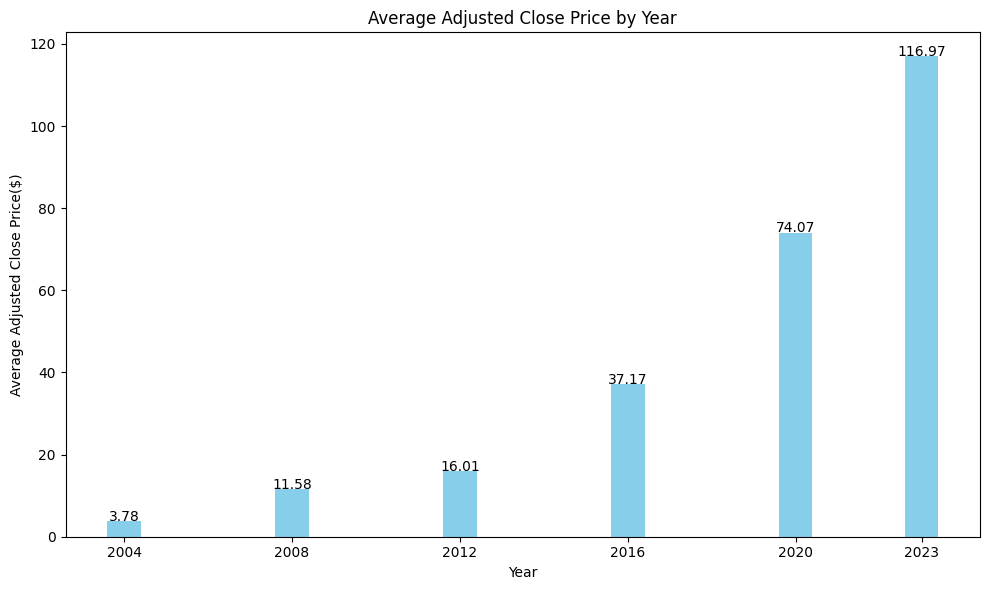

In [ ]:
#Adj Close 부분을 이용하여 각 연도 평균 가격 계산
avgp_2004 = data_2004['Adj Close'].mean()
avgp_2008 = data_2008['Adj Close'].mean()
avgp_2012 = data_2012['Adj Close'].mean()
avgp_2016 = data_2016['Adj Close'].mean()
avgp_2020 = data_2020['Adj Close'].mean()
avgp_2023 = data_2023['Adj Close'].mean()

#그래프의 x축에 사용될 연도 리스트
years = [2004, 2008, 2012, 2016, 2020, 2023]
#각 연도별로 계산된 평균 Adj Close를 나타내는 리스트
avgp = [avgp_2004, avgp_2008, avgp_2012, avgp_2016, avgp_2020, avgp_2023]

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(years, avgp, color='skyblue')
#x축 라벨, y축 라벨, 그래프 제목 설정
plt.xlabel('Year')
plt.ylabel('Average Adjusted Close Price($)')
plt.title('Average Adjusted Close Price by Year')
plt.xticks(years)  # x축 눈금 설정

# 막대 위에 숫자 표시
for i, price in enumerate(avgp):
    plt.text(years[i], price + 0.1, f"{price:.2f}", ha='center')

plt.tight_layout()
plt.show()

위 그래프는 각 년도별 평균 조정된 마감 가격입니다.

*   2004년 3.78 달러
*   2008년 11.58 달러
*   2012년 16.01 달러
*   2016년 37.17 달러
*   2020년 74.07 달러
*   2023년 116.97 달러

2004~2012년도까지는 평균 주가가 소폭 상승된 것을 볼 수 있습니다.

2016~2023년도까지 평균 주가가 **급격히 상승**된 것을 볼 수 있습니다.



이러한 정보를 통해 주식 시장에서의 주가는 지속적으로 상승하여 높은 수준까지 성장하고 있는 것을 확인할 수 있고, 특히 2016년 이후에는 상당한 상승세를 보여줬으며, 향후 동향이 더욱 주목받을 것으로 예상됩니다.














# ✅거래량 비교


1. 각 연도별로 월을 기준으로 그룹화하여 최소 거래량 및 최대 거래량을 찾습니다.
2. 그 결과를 사용하여 각 연도별 최소 거래량과 최대 거래량을 출력합니다.
3. 각 연도별로 월별 최소 거래량과 최대 거래량의 그래프를 나타냅니다.



In [15]:

# 각 연도별로 월을 기준으로 그룹화하여 최저 거래량 및 최고 거래량 찾기
min_volume_by_month_2004 = data_2004.groupby(data_2004['Date'].dt.month)['Volume'].min()
max_volume_by_month_2004 = data_2004.groupby(data_2004['Date'].dt.month)['Volume'].max()
#각 연도별 최저 거래량 및 최고 거래량
minv_2004 = "{:,}".format(data_2004['Volume'].min())
maxv_2004 = "{:,}".format(data_2004['Volume'].max())
#최저 거래량 및 최고 거래량 출력
print(f"Minimum volume for 2004: {minv_2004}")
print(f"Maximum volume for 2004: {maxv_2004}\n")

min_volume_by_month_2008 = data_2008.groupby(data_2008['Date'].dt.month)['Volume'].min()
max_volume_by_month_2008 = data_2008.groupby(data_2008['Date'].dt.month)['Volume'].max()
minv_2008 = "{:,}".format(data_2008['Volume'].min())
maxv_2008 = "{:,}".format(data_2008['Volume'].max())

print(f"Minimum volume for 2008: {minv_2008}")
print(f"Maximum volume for 2008: {maxv_2008}\n")

min_volume_by_month_2012 = data_2012.groupby(data_2012['Date'].dt.month)['Volume'].min()
max_volume_by_month_2012 = data_2012.groupby(data_2012['Date'].dt.month)['Volume'].max()
minv_2012 = "{:,}".format(data_2012['Volume'].min())
maxv_2012 = "{:,}".format(data_2012['Volume'].max())

print(f"Minimum volume for 2012: {minv_2012}")
print(f"Maximum volume for 2012: {maxv_2012}\n")

min_volume_by_month_2016 = data_2016.groupby(data_2016['Date'].dt.month)['Volume'].min()
max_volume_by_month_2016 = data_2016.groupby(data_2016['Date'].dt.month)['Volume'].max()
minv_2016 = "{:,}".format(data_2016['Volume'].min())
maxv_2016 = "{:,}".format(data_2016['Volume'].max())

print(f"Minimum volume for 2016: {minv_2016}")
print(f"Maximum volume for 2016: {maxv_2016}\n")

min_volume_by_month_2020 = data_2020.groupby(data_2020['Date'].dt.month)['Volume'].min()
max_volume_by_month_2020 = data_2020.groupby(data_2020['Date'].dt.month)['Volume'].max()
minv_2020 = "{:,}".format(data_2020['Volume'].min())
maxv_2020 = "{:,}".format(data_2020['Volume'].max())

print(f"Minimum volume for 2020: {minv_2020}")
print(f"Maximum volume for 2020: {maxv_2020}\n")

min_volume_by_month_2023 = data_2023.groupby(data_2023['Date'].dt.month)['Volume'].min()
max_volume_by_month_2023 = data_2023.groupby(data_2023['Date'].dt.month)['Volume'].max()
minv_2023 = "{:,}".format(data_2023['Volume'].min())
maxv_2023 = "{:,}".format(data_2023['Volume'].max())

print(f"Minimum volume for 2023: {minv_2023}")
print(f"Maximum volume for 2023: {maxv_2023}\n")


Minimum volume for 2004: 81,620,792
Maximum volume for 2004: 1,481,207,196

Minimum volume for 2008: 77,148,090
Maximum volume for 2008: 934,983,461

Minimum volume for 2012: 33,762,076
Maximum volume for 2012: 499,561,487

Minimum volume for 2016: 11,748,000
Maximum volume for 2016: 126,962,000

Minimum volume for 2020: 6,936,000
Maximum volume for 2020: 86,582,000

Minimum volume for 2023: 13,888,300
Maximum volume for 2023: 97,798,600



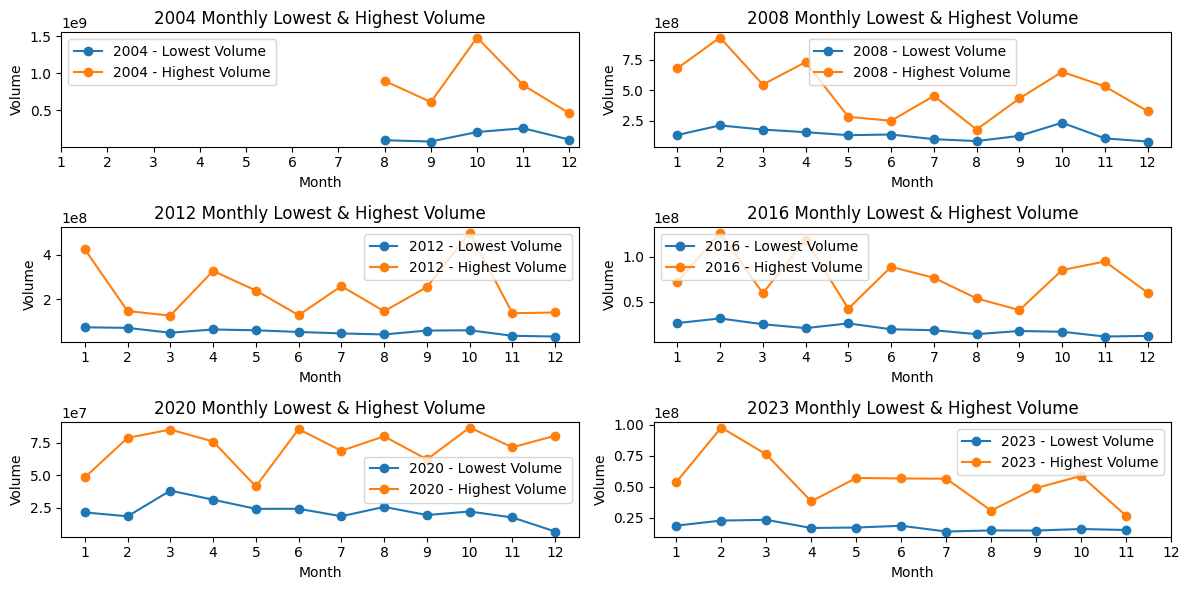

In [ ]:
#그래프 사이즈
plt.figure(figsize=(12, 6))

#서브플롯이 3행 2열의 격자 형태 중 첫 번째
plt.subplot(3, 2, 1)
#선 그래프 표시, 데이터 포인트를 원형, 라벨 설정
plt.plot(min_volume_by_month_2004.index, min_volume_by_month_2004.values, marker='o', label='2004 - Lowest Volume')
plt.plot(max_volume_by_month_2004.index, max_volume_by_month_2004.values, marker='o', label='2004 - Highest Volume')
#x축 라벨, y축 라벨, 그래프 제목 설정
plt.xlabel('Month')
plt.ylabel('Volume')
plt.title('2004 Monthly Lowest & Highest Volume')
plt.xticks(range(1, 13))  # x축 눈금 설정 (1~12월)
plt.legend()


#서브플롯이 3행 2열의 격자 형태 중 두 번째
plt.subplot(3, 2, 2)
#선 그래프 표시, 데이터 포인트를 원형, 라벨 설정
plt.plot(min_volume_by_month_2008.index, min_volume_by_month_2008.values, marker='o', label='2008 - Lowest Volume')
plt.plot(max_volume_by_month_2008.index, max_volume_by_month_2008.values, marker='o', label='2008 - Highest Volume')
#x축 라벨, y축 라벨, 그래프 제목 설정
plt.xlabel('Month')
plt.ylabel('Volume')
plt.title('2008 Monthly Lowest & Highest Volume')
plt.xticks(range(1, 13))  # x축 눈금 설정 (1~12월)
plt.legend()

#서브플롯이 3행 2열의 격자 형태 중 세 번쨰
plt.subplot(3, 2, 3)
#선 그래프 표시, 데이터 포인트를 원형, 라벨 설정
plt.plot(min_volume_by_month_2012.index, min_volume_by_month_2012.values, marker='o', label='2012 - Lowest Volume')
plt.plot(max_volume_by_month_2012.index, max_volume_by_month_2012.values, marker='o', label='2012 - Highest Volume')
#x축 라벨, y축 라벨, 그래프 제목 설정
plt.xlabel('Month')
plt.ylabel('Volume')
plt.title('2012 Monthly Lowest & Highest Volume')
plt.xticks(range(1, 13))  # x축 눈금 설정 (1~12월)
plt.legend()

#서브플롯이 3행 2열의 격자 형태 중 네 번째
plt.subplot(3, 2, 4)
#선 그래프 표시, 데이터 포인트를 원형, 라벨 설정
plt.plot(min_volume_by_month_2016.index, min_volume_by_month_2016.values, marker='o', label='2016 - Lowest Volume')
plt.plot(max_volume_by_month_2016.index, max_volume_by_month_2016.values, marker='o', label='2016 - Highest Volume')
#x축 라벨, y축 라벨, 그래프 제목 설정
plt.xlabel('Month')
plt.ylabel('Volume')
plt.title('2016 Monthly Lowest & Highest Volume')
plt.xticks(range(1, 13))  # x축 눈금 설정 (1~12월)
plt.legend()

#서브플롯이 3행 2열의 격자 형태 중 다섯 번째
plt.subplot(3, 2, 5)
#선 그래프 표시, 데이터 포인트를 원형, 라벨 설정
plt.plot(min_volume_by_month_2020.index, min_volume_by_month_2020.values, marker='o', label='2020 - Lowest Volume')
plt.plot(max_volume_by_month_2020.index, max_volume_by_month_2020.values, marker='o', label='2020 - Highest Volume')
#x축 라벨, y축 라벨, 그래프 제목 설정
plt.xlabel('Month')
plt.ylabel('Volume')
plt.title('2020 Monthly Lowest & Highest Volume')
plt.xticks(range(1, 13))  # x축 눈금 설정 (1~12월)
plt.legend()

#서브플롯이 3행 2열의 격자 형태 중 여섯 번째
plt.subplot(3, 2, 6)
#선 그래프 표시, 데이터 포인트를 원형, 라벨 설정
plt.plot(min_volume_by_month_2023.index, min_volume_by_month_2023.values, marker='o', label='2023 - Lowest Volume')
plt.plot(max_volume_by_month_2023.index, max_volume_by_month_2023.values, marker='o', label='2023 - Highest Volume')
#x축 라벨, y축 라벨, 그래프 제목 설정
plt.xlabel('Month')
plt.ylabel('Volume')
plt.title('2023 Monthly Lowest & Highest Volume')
plt.xticks(range(1, 13))  # x축 눈금 설정 (1~12월)
plt.legend()

plt.tight_layout()
plt.show()

위 그래프는 각 연도별 1~12월까지의 최저 거래량과 최고 거래량을 나타내는 그래프입니다.



*   2004년 - 가장 최저 거래월 = 9월 / 가장 최다 거래월 = 10월
*   2008년 - 가장 최저 거래월 = 12월 / 가장 최다 거래월 = 2월
*   2012년 - 가장 최저 거래월 = 12월 / 가장 최다 거래월 = 10월
*   2016년 - 가장 최저 거래월 = 11월 / 가장 최다 거래월 = 2월
*   2020년 - 가장 최저 거래월 = 12월 / 가장 최다 거래월 = 11월
*   2023년 - 가장 최저 거래월 = 7월 / 가장 최다 거래월 = 2월

일반적으로 **하반기에 거래량이 적은 것**을 알 수 있고, 2월과 10월에 거래량이 많은 것을 보면 **최다 거래량은 계절이나 시기에 영향이 별로 없는 것**을 알 수 있습니다.
연도별로 비교를 하면 **2004년에 가장 거래량이 많았고**, **2020년에 가장 거래량이 적었습니다**.






# **✅수익률**
각 년마다 첫 월의 'Adj Close'값으로 50주를 매수하고 마지막 월의 'Adj Close'값으로 50주를 매도한다고 가정 했을때
어떤 년도가 가장 수익률이 좋고, 어떤 년도가 수익률이 가장 안좋은지 비교

In [28]:
# 2004년 데이터에서 첫 번째 날의 Adj Close와 마지막 날의 Adj Close를 가져옴
startp_2004 = data_2004.iloc[0]['Adj Close']
endp_2004 = data_2004.iloc[-1]['Adj Close']

# 2008년 데이터에서 첫 번째 날의 Adj Close와 마지막 날의 Adj Close를 가져옴
startp_2008 = data_2008.iloc[0]['Adj Close']
endp_2008 = data_2008.iloc[-1]['Adj Close']

# 2012년 데이터에서 첫 번째 날의 Adj Close와 마지막 날의 Adj Close를 가져옴
startp_2012 = data_2012.iloc[0]['Adj Close']
endp_2012 = data_2012.iloc[-1]['Adj Close']

# 2016년 데이터에서 첫 번째 날의 Adj Close와 마지막 날의 Adj Close를 가져옴
startp_2016 = data_2016.iloc[0]['Adj Close']
endp_2016 = data_2016.iloc[-1]['Adj Close']

# 2020년 데이터에서 첫 번째 날의 Adj Close와 마지막 날의 Adj Close를 가져옴
startp_2020 = data_2020.iloc[0]['Adj Close']
endp_2020 = data_2020.iloc[-1]['Adj Close']

# 2023년 데이터에서 첫 번째 날의 Adj Close와 마지막 날의 Adj Close를 가져옴
startp_2023 = data_2023.iloc[0]['Adj Close']
endp_2023 = data_2023.iloc[-1]['Adj Close']

stock = 50  # 50주 보유 가정

# 2004년 주식 수익률과 금액 변화 계산
initial_investment_2004 = startp_2004 * stock
final_value_2004 = endp_2004 * stock
profit_rate_2004 = ((final_value_2004 - initial_investment_2004) / initial_investment_2004) * 100

# 2008년 주식 수익률과 금액 변화 계산
initial_investment_2008 = startp_2008 * stock
final_value_2008 = endp_2008 * stock
profit_rate_2008 = ((final_value_2008 - initial_investment_2008) / initial_investment_2008) * 100

# 2012년 주식 수익률과 금액 변화 계산
initial_investment_2012 = startp_2012 * stock
final_value_2012 = endp_2012 * stock
profit_rate_2012 = ((final_value_2012 - initial_investment_2012) / initial_investment_2012) * 100

# 2016년 주식 수익률과 금액 변화 계산
initial_investment_2016 = startp_2016 * stock
final_value_2016 = endp_2016 * stock
profit_rate_2016 = ((final_value_2016 - initial_investment_2016) / initial_investment_2016) * 100

# 2020년 주식 수익률과 금액 변화 계산
initial_investment_2020 = startp_2020 * stock
final_value_2020 = endp_2020 * stock
profit_rate_2020 = ((final_value_2020 - initial_investment_2020) / initial_investment_2020) * 100

# 2023년 주식 수익률과 금액 변화 계산
initial_investment_2023 = startp_2023 * stock
final_value_2023 = endp_2023 * stock
profit_rate_2023 = ((final_value_2023 - initial_investment_2023) / initial_investment_2023) * 100


# 주식 수익률 출력
print(f"2004년 주식 수익률: {profit_rate_2004:.2f}%")
print(f"2008년 주식 수익률: {profit_rate_2008:.2f}%")
print(f"2012년 주식 수익률: {profit_rate_2012:.2f}%")
print(f"2016년 주식 수익률: {profit_rate_2016:.2f}%")
print(f"2020년 주식 수익률: {profit_rate_2020:.2f}%")
print(f"2023년 주식 수익률: {profit_rate_2023:.2f}%")

2004년 주식 수익률: 92.00%
2008년 주식 수익률: -55.13%
2012년 주식 수익률: 6.34%
2016년 주식 수익률: 4.04%
2020년 주식 수익률: 28.11%
2023년 주식 수익률: 49.45%


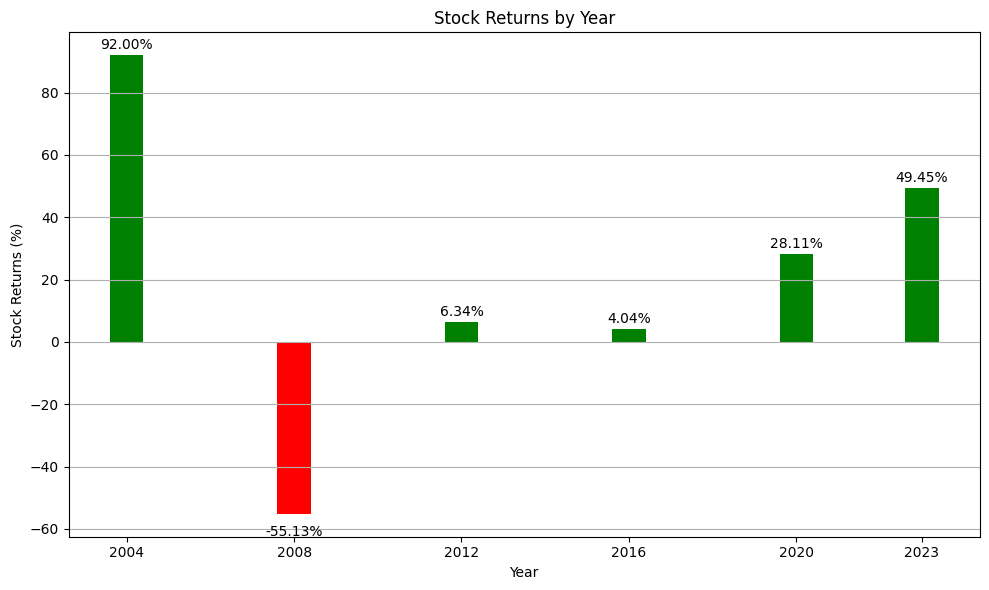

In [26]:
# 연도와 수익률 데이터
returns = [profit_rate_2004, profit_rate_2008, profit_rate_2012, profit_rate_2016, profit_rate_2020, profit_rate_2023]

plt.figure(figsize=(10, 6))
plt.bar(years, returns, color=['green' if x > 0 else 'red' for x in returns])
#x축 라벨, y축 라벨, 그래프 제목 설정
plt.xlabel('Year')
plt.ylabel('Stock Returns (%)')
plt.title('Stock Returns by Year')

# 막대 위에 숫자 표시
for i, ret in enumerate(returns):
    plt.text(years[i], ret + 2 if ret > 0 else ret - 7, f"{ret:.2f}%", ha='center')

plt.xticks(years)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

위 그래프는 각 연도별로 첫 월에 매수하여 마지막 월에 매도하였을 때의 수익률을 가지고 비교한 그래프입니다.



*   2004년 - 첫 월 'Adj Close' = 2.5 / 마지막 월 'Adj Close' = 4.8

      ▶ 2004년 수익률 = 92%
*   2008년 - 첫 월 'Adj Close' = 17.07 / 마지막 월 'Adj Close' = 7.66

      ▶ 2008년 수익률 = -55.13%
*   2012년 - 첫 월 'Adj Close' = 16.57 / 마지막 월 'Adj Close' = 17.62

      ▶ 2012년 수익률 = 6.34%
*   2016년 - 첫 월 'Adj Close' = 37.09 / 마지막 월 'Adj Close' = 38.59

      ▶ 2016년 수익률 = 4.04%
*   2020년 - 첫 월 'Adj Close' = 68.37 / 마지막 월 'Adj Close' = 87.59

      ▶ 2020년 수익률 = 28.11%
*   2023년 - 첫 월 'Adj Close' = 89.70 / 마지막 월 'Adj Close' = 134.06

      ▶ 2004년 수익률 = 49.45%

2004년에 수익률이 가장 높은 것을 알 수 있고, 2008년에 수익률이 가장 낮은 것을 알 수 있습니다.
